# PCA and k-means

## Setting up

In [11]:
"""
Author      : Yi-Chieh Wu, Sriram Sankararaman
"""
import collections
# numpy and scipy libraries
import numpy as np
from scipy import stats

# matplotlib libraries
import matplotlib.pyplot as plt

In [12]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
import sys
# Change the path below to the path where your folder locates
# where you have util.py
### ========== TODO : START ========== ###
sys.path.append('/content/gdrive/My Drive/20WINTER/CS M146/PSET4')
### ========== TODO : START ========== ###


In [14]:
import util
from util import *

## Point, Cluster and Set of Clusters classes

In [15]:
######################################################################
# classes
######################################################################

class Point(object) :
    
    def __init__(self, name, label, attrs) :
        """
        A data point.
        
        Attributes
        --------------------
            name  -- string, name
            label -- string, label
            attrs -- string, features
        """
        
        self.name = name
        self.label = label
        self.attrs = attrs
    
    
    #============================================================
    # utilities
    #============================================================
    
    def distance(self, other) :
        """
        Return Euclidean distance of this point with other point.
        
        Parameters
        --------------------
            other -- Point, point to which we are measuring distance
        
        Returns
        --------------------
            dist  -- float, Euclidean distance
        """
        # Euclidean distance metric
        return np.linalg.norm(self.attrs-other.attrs)
    
    
    def __str__(self) :
        """
        Return string representation.
        """
        return "%s : (%s, %s)" % (self.name, str(self.attrs), self.label)

In [16]:
class Cluster(object) :
    
    def __init__(self, points) :
        """
        A cluster (set of points).
        
        Attributes
        --------------------
            points -- list of Points, cluster elements
        """        
        self.points = points
    
    
    def __str__(self) :
        """
        Return string representation.
        """
        s = ""
        for point in self.points :
            s += str(point)
        return s
        
    #============================================================
    # utilities
    #============================================================
    
    def purity(self) :
        """
        Compute cluster purity.
        
        Returns
        --------------------
            n           -- int, number of points in this cluster
            num_correct -- int, number of points in this cluster
                                with label equal to most common label in cluster
        """        
        labels = []
        for p in self.points :
            labels.append(p.label)
        
        cluster_label, count = stats.mode(labels)
        return len(labels), np.float64(count)
    
    
    def centroid(self) :
        """
        Compute centroid of this cluster.
        
        Returns
        --------------------
            centroid -- Point, centroid of cluster
        """
        
        ### ========== TODO : START ========== ###
        # part 2b: implement
        # set the centroid label to any value (e.g. the most common label in this cluster)
        attributes = np.array([point.attrs for point in self.points])
        position = np.sum(attributes, axis=0)/len(self.points)

        # find the most common label in the cluster
        labels = []
        for p in self.points:
            labels.append(p.label)

        cluster_label, count = stats.mode(labels)
        centroid = Point('C', cluster_label[0], position)
        return centroid
        ### ========== TODO : END ========== ###
    
    
    def medoid(self) :
        """
        Compute medoid of this cluster, that is, the point in this cluster
        that is closest to all other points in this cluster.
        
        Returns
        --------------------
            medoid -- Point, medoid of this cluster
        """
        
        ### ========== TODO : START ========== ###
        # part 2b: implement
        distances = {}

        # find distance of each point to all other points except itself
        for p in self.points:
            distances[p] = []
            for other in self.points:
                if other != p: 
                    distances[p].append(p.distance(other))

        # find the avg distance of each point to other points
        for key, value in distances.items():
            mean = np.mean(value)
            distances[key] = mean

        # get point with minimum avg distance
        medoid = min(distances, key=distances.get)
        return medoid
        ### ========== TODO : END ========== ###
    
    
    def equivalent(self, other) :
        """
        Determine whether this cluster is equivalent to other cluster.
        Two clusters are equivalent if they contain the same set of points
        (not the same actual Point objects but the same geometric locations).
        
        Parameters
        --------------------
            other -- Cluster, cluster to which we are comparing this cluster
        
        Returns
        --------------------
            flag  -- bool, True if both clusters are equivalent or False otherwise
        """
        
        if len(self.points) != len(other.points) :
            return False
        
        matched = []
        for point1 in self.points :
            for point2 in other.points :
                if point1.distance(point2) == 0 and point2 not in matched :
                    matched.append(point2)
        return len(matched) == len(self.points)

In [17]:
class ClusterSet(object):

    def __init__(self) :
        """
        A cluster set (set of clusters).
        
        Parameters
        --------------------
            members -- list of Clusters, clusters that make up this set
        """
        self.members = []
    
    
    #============================================================
    # utilities
    #============================================================    
    
    def centroids(self) :
        """
        Return centroids of each cluster in this cluster set.
        
        Returns
        --------------------
            centroids -- list of Points, centroids of each cluster in this cluster set
        """
        
        ### ========== TODO : START ========== ###
        # part 2b: implement
        centroids = []
        for cluster in self.members:
            centroids.append(cluster.centroid())

        return centroids
        ### ========== TODO : END ========== ###
    
    
    def medoids(self) :
        """
        Return medoids of each cluster in this cluster set.
        
        Returns
        --------------------
            medoids -- list of Points, medoids of each cluster in this cluster set
        """
        
        ### ========== TODO : START ========== ###
        # part 2b: implement
        medoids = []
        for cluster in self.members:
            medoids.append(cluster.medoid())

        return medoids
        ### ========== TODO : END ========== ###
    
    
    def score(self) :
        """
        Compute average purity across clusters in this cluster set.
        
        Returns
        --------------------
            score -- float, average purity
        """
        
        total_correct = 0
        total = 0
        for c in self.members :
            n, n_correct = c.purity()
            total += n
            total_correct += n_correct
        return total_correct / float(total)
    
    
    def equivalent(self, other) :
        """ 
        Determine whether this cluster set is equivalent to other cluster set.
        Two cluster sets are equivalent if they contain the same set of clusters
        (as computed by Cluster.equivalent(...)).
        
        Parameters
        --------------------
            other -- ClusterSet, cluster set to which we are comparing this cluster set
        
        Returns
        --------------------
            flag  -- bool, True if both cluster sets are equivalent or False otherwise
        """
        
        if len(self.members) != len(other.members):
            return False
        
        matched = []
        for cluster1 in self.members :
            for cluster2 in other.members :
                if cluster1.equivalent(cluster2) and cluster2 not in matched:
                    matched.append(cluster2)
        return len(matched) == len(self.members)
    
    
    #============================================================
    # manipulation
    #============================================================

    def add(self, cluster):
        """
        Add cluster to this cluster set (only if it does not already exist).
        
        If the cluster is already in this cluster set, raise a ValueError.
        
        Parameters
        --------------------
            cluster -- Cluster, cluster to add
        """
        
        if cluster in self.members :
            raise ValueError
        
        self.members.append(cluster)

## k-means and k-medoids algorithms

In [18]:
######################################################################
# k-means and k-medoids
######################################################################

def random_init(points, k) :
    """
    Randomly select k unique elements from points to be initial cluster centers.
    
    Parameters
    --------------------
        points         -- list of Points, dataset
        k              -- int, number of clusters
    
    Returns
    --------------------
        initial_points -- list of k Points, initial cluster centers
    """
    ### ========== TODO : START ========== ###
    # part 2c: implement (hint: use np.random.choice)
    return np.random.choice(points, size=k, replace=False)
    ### ========== TODO : END ========== ###


def cheat_init(points) :
    """
    Initialize clusters by cheating!
    
    Details
    - Let k be number of unique labels in dataset.
    - Group points into k clusters based on label (i.e. class) information.
    - Return medoid of each cluster as initial centers.
    
    Parameters
    --------------------
        points         -- list of Points, dataset
    
    Returns
    --------------------
        initial_points -- list of k Points, initial cluster centers
    """
    ### ========== TODO : START ========== ###
    # part 2f: implement
    labels = set() # set of unique labels
    for p in points:
        labels.add(p.label)

    groups = {}
    for label in labels:
        groups[label] = []
    
    for p in points:
        groups[p.label].append(p)
    
    clusters = []
    for key, value in groups.items():
        cluster = Cluster(value)
        clusters.append(cluster)

    initial_points = [cluster.medoid() for cluster in clusters]
    return initial_points
    ### ========== TODO : END ========== ###

def kAverages(points, k, average, init='random', plot=True):
    if init == 'random':
        mus = random_init(points, k)
    
    elif init == 'cheat':
        mus = cheat_init(points)
    
    k_clusters = ClusterSet()
    i = 1
    while True:
        #print(f"------ITERATION {i}------")
        clusters = {}
        for mu in mus:
          clusters[mu] = Cluster([])

        # add points to cluster from initializations
        for p in points: 
            curr_distances = [p.distance(mu) for mu in mus]
            index = np.argmin(curr_distances)
            closest_mu = mus[index]
            clusters[closest_mu].points.append(p)
      
        # convert these assignments to a new_cluster set
        new_clusters = ClusterSet()
        for mu, cluster in clusters.items():
            new_clusters.add(cluster)
      
        # stop when clustering no longer changes
        if len(k_clusters.members) > 0 and (k_clusters.equivalent(new_clusters)):
            if average == ClusterSet.centroids:
                name = "K-Means"
            else:
                name = "K-Medoids"
            print(f"{name} STOPPED AT ITERATION:{i}")
            break

        # update mus to new centroids
        mus = average(new_clusters)
        k_clusters = new_clusters
        
        if plot == True:
            if average == ClusterSet.centroids:
                plot_clusters(new_clusters, f"K-Means [K={k}, init={init}] at i={i}", average)
            else:
                plot_clusters(new_clusters, f"K-Medoids [K={k}, init={init}] at i={i}", average)

        i += 1

    return k_clusters



def kMeans(points, k, init='random', plot=False) :
    """
    Cluster points into k clusters using variations of k-means algorithm.
    
    Parameters
    --------------------
        points  -- list of Points, dataset
        k       -- int, number of clusters
        average -- method of ClusterSet
                   determines how to calculate average of points in cluster
                   allowable: ClusterSet.centroids, ClusterSet.medoids
        init    -- string, method of initialization
                   allowable: 
                       'cheat'  -- use cheat_init to initialize clusters
                       'random' -- use random_init to initialize clusters
        plot    -- bool, True to plot clusters with corresponding averages
                         for each iteration of algorithm
    
    Returns
    --------------------
        k_clusters -- ClusterSet, k clusters
    """
    
    ### ========== TODO : START ========== ###
    # part 2c: implement
    # Hints:
    #   (1) On each iteration, keep track of the new cluster assignments
    #       in a separate data structure. Then use these assignments to create
    #       a new ClusterSet object and update the centroids.
    #   (2) Repeat until the clustering no longer changes.
    #   (3) To plot, use plot_clusters(...).

    return kAverages(points, k, ClusterSet.centroids, init=init, plot=plot)
    ### ========== TODO : END ========== ###


def kMedoids(points, k, init='random', plot=False) :
    """
    Cluster points in k clusters using k-medoids clustering.
    See kMeans(...).
    """
    ### ========== TODO : START ========== ###
    # part 2e: implement

    return kAverages(points, k, ClusterSet.medoids, init=init, plot=plot)
    ### ========== TODO : END ========== ###

## Utilities

In [19]:
######################################################################
# helper functions
######################################################################

def build_face_image_points(X, y) :
    """
    Translate images to (labeled) points.
    
    Parameters
    --------------------
        X     -- numpy array of shape (n,d), features (each row is one image)
        y     -- numpy array of shape (n,), targets
    
    Returns
    --------------------
        point -- list of Points, dataset (one point for each image)
    """
    
    n,d = X.shape
    
    images = collections.defaultdict(list) # key = class, val = list of images with this class
    for i in range(n) :
        images[y[i]].append(X[i,:])
    
    points = []
    for face in images :
        count = 0
        for im in images[face] :
            points.append(Point(str(face) + '_' + str(count), face, im))
            count += 1

    return points


def plot_clusters(clusters, title, average) :
    """
    Plot clusters along with average points of each cluster.

    Parameters
    --------------------
        clusters -- ClusterSet, clusters to plot
        title    -- string, plot title
        average  -- method of ClusterSet
                    determines how to calculate average of points in cluster
                    allowable: ClusterSet.centroids, ClusterSet.medoids
    """
    
    plt.figure()
    np.random.seed(20)
    label = 0
    colors = {}
    centroids = average(clusters)
    for c in centroids :
        coord = c.attrs
        plt.plot(coord[0],coord[1], 'ok', markersize=12)
    for cluster in clusters.members :
        label += 1
        colors[label] = np.random.rand(3,)
        for point in cluster.points :
            coord = point.attrs
            plt.plot(coord[0], coord[1], 'o', color=colors[label])
    plt.title(title)
    plt.show()


def generate_points_2d(N, seed=1234) :
    """
    Generate toy dataset of 3 clusters each with N points.
    
    Parameters
    --------------------
        N      -- int, number of points to generate per cluster
        seed   -- random seed
    
    Returns
    --------------------
        points -- list of Points, dataset
    """
    np.random.seed(seed)
    
    mu = [[0,0.5], [1,1], [2,0.5]]
    sigma = [[0.1,0.1], [0.25,0.25], [0.15,0.15]]
    
    label = 0
    points = []
    for m,s in zip(mu, sigma) :
        label += 1
        for i in range(N) :
            x = random_sample_2d(m, s)
            points.append(Point(str(label)+'_'+str(i), label, x))
    
    return points

## Main function

Total dataset size:
	num_samples: 1867
	num_features: 1850
	num_classes: 19


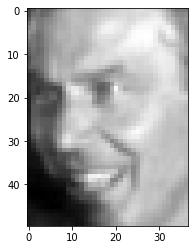

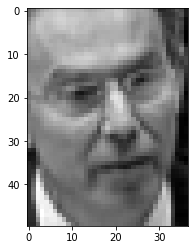

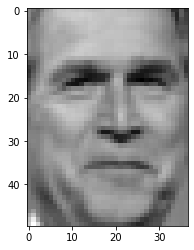

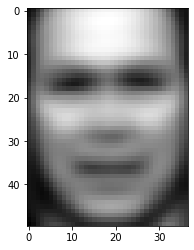

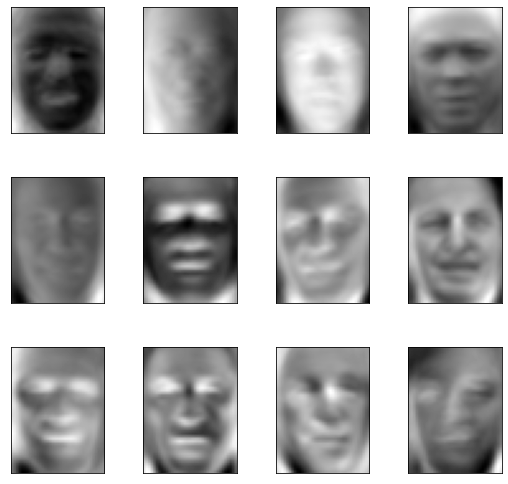

Originals


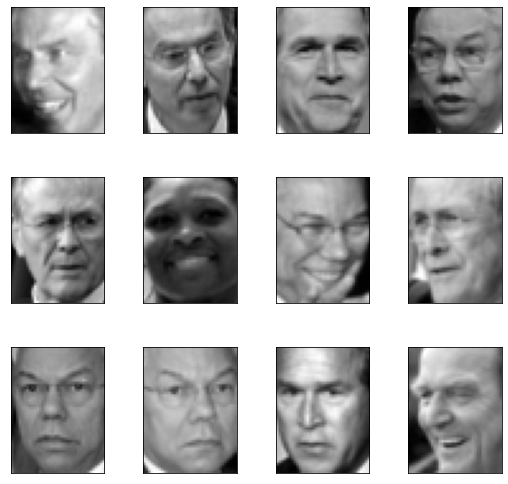

l=1


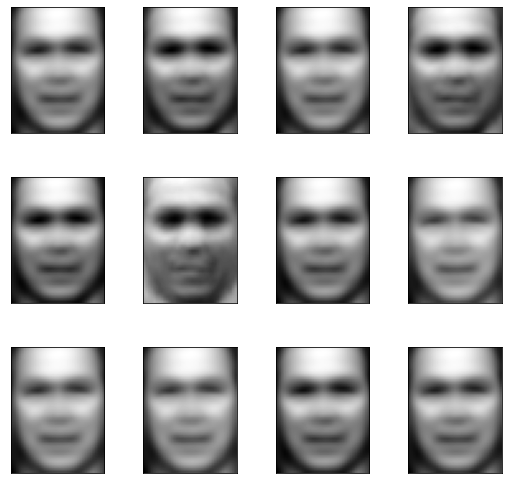

l=10


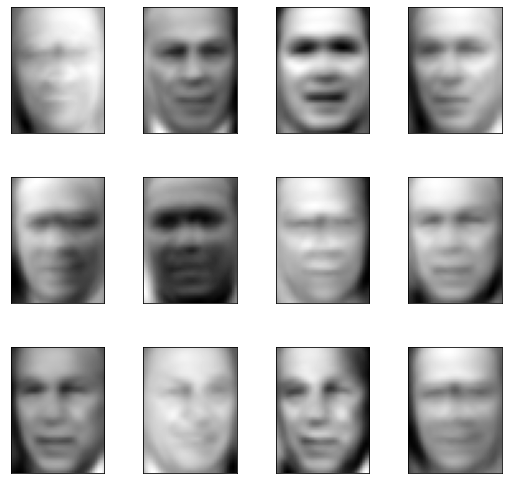

l=50


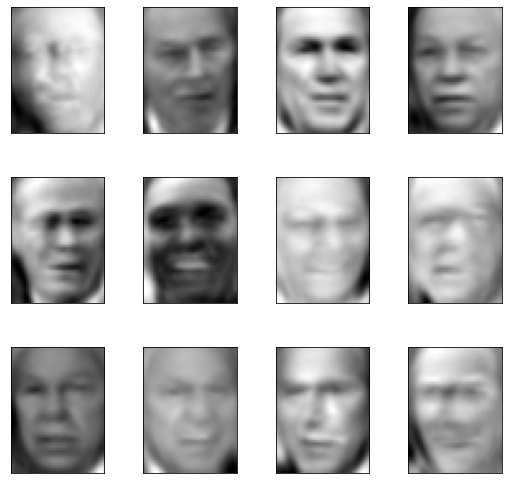

l=100


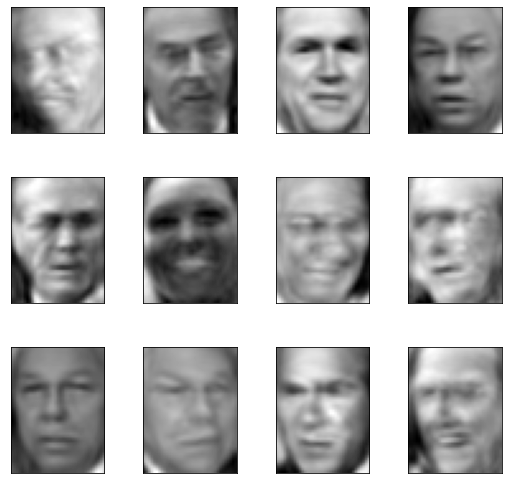

l=500


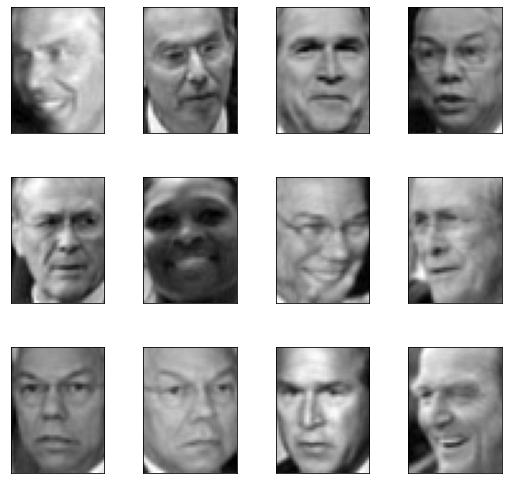

l=1288


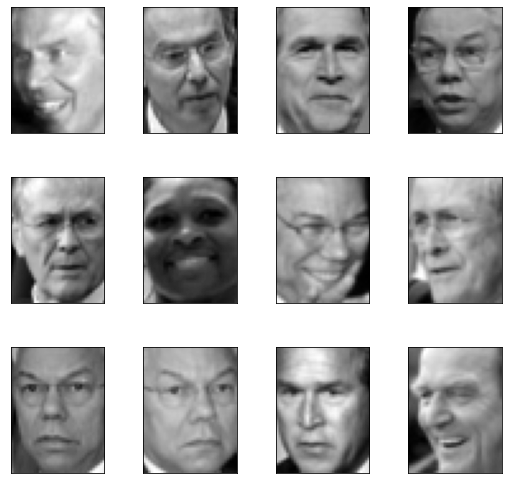

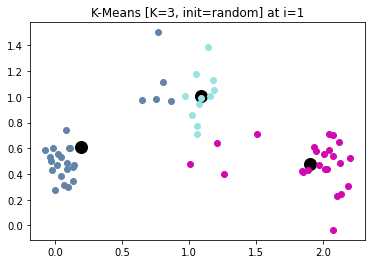

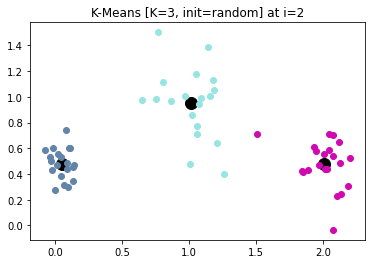

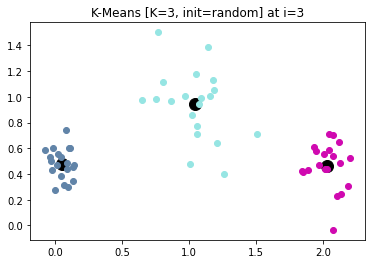

K-Means STOPPED AT ITERATION:4


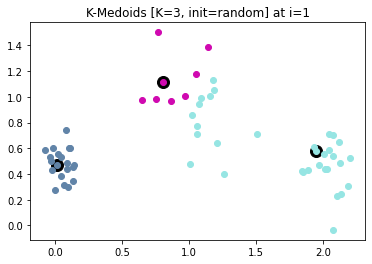

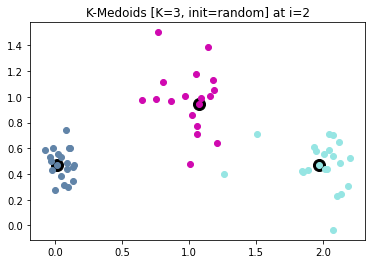

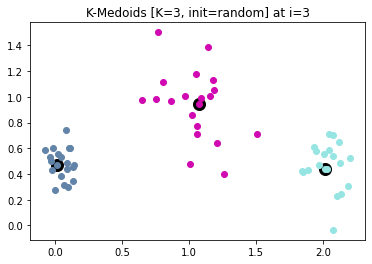

K-Medoids STOPPED AT ITERATION:4


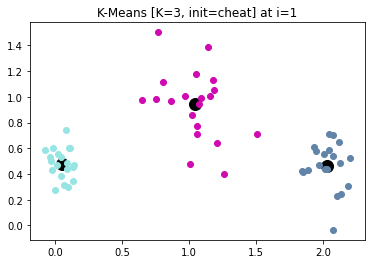

K-Means STOPPED AT ITERATION:2


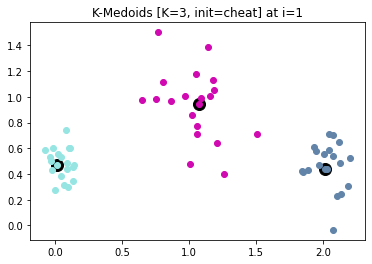

K-Medoids STOPPED AT ITERATION:2
K-Means STOPPED AT ITERATION:7
K-Medoids STOPPED AT ITERATION:3
K-Means STOPPED AT ITERATION:6
K-Medoids STOPPED AT ITERATION:7
K-Means STOPPED AT ITERATION:5
K-Medoids STOPPED AT ITERATION:4
K-Means STOPPED AT ITERATION:9
K-Medoids STOPPED AT ITERATION:4
K-Means STOPPED AT ITERATION:11
K-Medoids STOPPED AT ITERATION:3
K-Means STOPPED AT ITERATION:5
K-Medoids STOPPED AT ITERATION:4
K-Means STOPPED AT ITERATION:6
K-Medoids STOPPED AT ITERATION:3
K-Means STOPPED AT ITERATION:8
K-Medoids STOPPED AT ITERATION:3
K-Means STOPPED AT ITERATION:14
K-Medoids STOPPED AT ITERATION:4
K-Means STOPPED AT ITERATION:6
K-Medoids STOPPED AT ITERATION:4
	 average min	 max
kMeans	 0.6175	 0.55	 0.775
kMedoids 0.6325	 0.575	 0.725
K-Means STOPPED AT ITERATION:5
K-Medoids STOPPED AT ITERATION:5
K-Means STOPPED AT ITERATION:13
K-Medoids STOPPED AT ITERATION:3
K-Means STOPPED AT ITERATION:5
K-Medoids STOPPED AT ITERATION:2
K-Means STOPPED AT ITERATION:4
K-Medoids STOPPED AT ITE

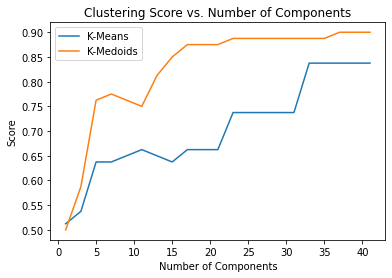

K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:3
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:3
K-Medoids STOPPED AT ITERATION:3
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:2
K-Medoids STOPPED AT ITERATION:3
K-Medoids STOPPED AT ITERATION:2
K-Medoids 

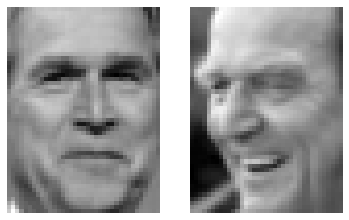

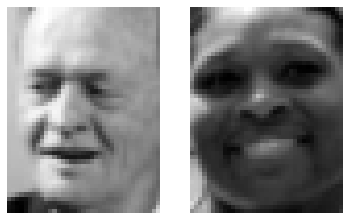

In [20]:
######################################################################
# main
######################################################################

def main() :
    ### ========== TODO : START ========== ###
    # part 1: explore LFW data set

    # part 1a: get LFW dataset labels, plot some input images 
    # compute mean and plot average face
    X, y = get_lfw_data()

    show_image(X[0])
    show_image(X[1])
    show_image(X[2])

    # compute mean of all the images
    X_mean = np.mean(X, axis=0)
    show_image(X_mean)

    # part 1b: perform PCA on the data and show top 12 eigenfaces
    U, mu = PCA(X)
    plot_gallery([vec_to_image(U[:,i]) for i in range(12)])

    # part 1c: explore the effect of using more or fewer dimensions to represent immages
    num_components = [1, 10, 50, 100, 500, 1288]
    print("Originals")
    plot_gallery(X[:12], title=f'First 12 images in original-dimension')
    for l in num_components:
      print(f'l={l}')
      Z, Ul = apply_PCA_from_Eig(X, U, l, mu)
      X_rec = reconstruct_from_PCA(Z, Ul, mu)
      plot_gallery(X_rec[:12], title=f'First 12 images in {l}-dimension')
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # part 2d-2f: cluster toy dataset
    np.random.seed(1234)
    N = 20
    toy_dataset = generate_points_2d(N)
    kMeans(toy_dataset, 3, init='random', plot=True)
    kMedoids(toy_dataset, 3, init='random', plot=True)

    kMeans(toy_dataset, 3, init='cheat', plot=True)
    kMedoids(toy_dataset, 3, init='cheat', plot=True)
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###   
    # part 3a: cluster faces
    np.random.seed(1234)
    X1, y1 = util.limit_pics(X, y, [4, 6, 13, 16], 40)
    points = build_face_image_points(X1, y1) 

    kMeans_scores = []
    kMedoids_scores = []
    for i in range(10):
      means = kMeans(points, 4, init='random')
      medoid = kMedoids(points, 4, init='random')
      kMeans_scores.append(means.score())
      kMedoids_scores.append(medoid.score())

    print('\t average min\t max')
    print(f'kMeans\t {round(sum(kMeans_scores)/len(kMeans_scores),4)}\t {round(min(kMeans_scores),4)}\t {round(max(kMeans_scores),4)}')
    print(f'kMedoids {round(sum(kMedoids_scores)/len(kMedoids_scores),4)}\t {round(min(kMedoids_scores),4)}\t {round(max(kMedoids_scores),4)}')

    # part 3b: explore effect of lower-dimensional representations on clustering performance
    np.random.seed(1234)
    U, mu = PCA(X)
    X1, y1 = util.limit_pics(X, y, [4, 13], 40)
    num_components = np.arange(1,42,2) # [1,3,5,...,41]
    K = 2

    kMeans_scores = []
    kMedoids_scores = []
    
    for l in num_components:
      Z, Ul = apply_PCA_from_Eig(X1, U, l, mu)
      X_rec = reconstruct_from_PCA(Z, Ul, mu)
      points = build_face_image_points(X_rec, y1)
      cluster_result = kMeans(points, K, init='cheat')
      kMeans_scores.append(cluster_result.score())
      cluster_result = kMedoids(points, K, init='cheat')
      kMedoids_scores.append(cluster_result.score())
    
    plt.figure()
    plt.plot(num_components, kMeans_scores, label='K-Means')
    plt.plot(num_components, kMedoids_scores, label='K-Medoids')
    plt.title("Clustering Score vs. Number of Components")
    plt.xlabel("Number of Components")
    plt.ylabel("Score")
    plt.legend()
    plt.show()
    
    # part 3c: determine ``most discriminative'' and ``least discriminative'' pairs of images
    np.random.seed(1234)
    classes = set(y)
    num_classes = len(classes)
    currMin = 9999999999
    currMax = 0
    MinPair = [0,0]
    MaxPair = [0,0]
    
    for i in range(num_classes):
      for j in range(num_classes):
        if i != j:
          X1, y1 = util.limit_pics(X, y, [i, j], 40)
          points = build_face_image_points(X1, y1)
          clusters = kMedoids(points, 2, init='cheat')
          score = clusters.score()
          if score > currMax:
            currMax = score
            MaxPair = [i,j]
          if score < currMin:
            currMin = score
            MinPair = [i,j]
    
    print(MinPair)
    print(MaxPair)
    plot_representative_images(X, y, MinPair)
    plot_representative_images(X, y, MaxPair)
    ### ========== TODO : END ========== ###


if __name__ == "__main__" :
    main()